In [218]:
from qiskit import *

In [219]:
bit_size = 3

k = 2 # strike price
n = 5 # asset price

k_string = format(k,f'0{bit_size}b')
n_string = format(n,f'0{bit_size}b') # [::-1] # reversed because qiskit's qubits are in reverse order 
                                    #!! unsure whether qubits should be reversed, should k_string be reversed as well?



In [220]:
inputs = QuantumRegister(bit_size,name='inputs')
ancillae = QuantumRegister(bit_size,name='ancillae')
output = QuantumRegister(1,name='output')
circ = QuantumCircuit(inputs,ancillae,output,ClassicalRegister(1))

for i in range(len(n_string)): # initialise the inputs to n_string
    if n_string[i]=='1':
        circ.x(inputs[i])

In [221]:
def ccOR(circ,a,b,ancilla): #controlled-controlled-OR gate
    circ.barrier()
    circ.x(a)
    circ.x(b)
    circ.x(ancilla)

    circ.ccx(a,b,ancilla)

    circ.x(a)
    circ.x(b)
    circ.barrier()
    return circ

In [222]:
def comparison(circ,a,b):
    if a == 0:# and b=='1': # there is no a-1 ancilla for a=0, so only a single CNOT is needed
        circ.cx(inputs[0],ancillae[0])
        return circ

    if b=='1':
        circ.barrier()
        circ.ccx(inputs[a],ancillae[a-1],ancillae[a])
    else:
        circ = ccOR(circ,inputs[a],ancillae[a-1],ancillae[a])
    return circ

In [223]:
for i in range(len(k_string)):
    circ.barrier()
    circ = comparison(circ,i,k_string[i])

circ.barrier()
circ.cx(ancillae[-1],output[0]) # copy onto output
circ.barrier()
circ.measure(output[0],0)

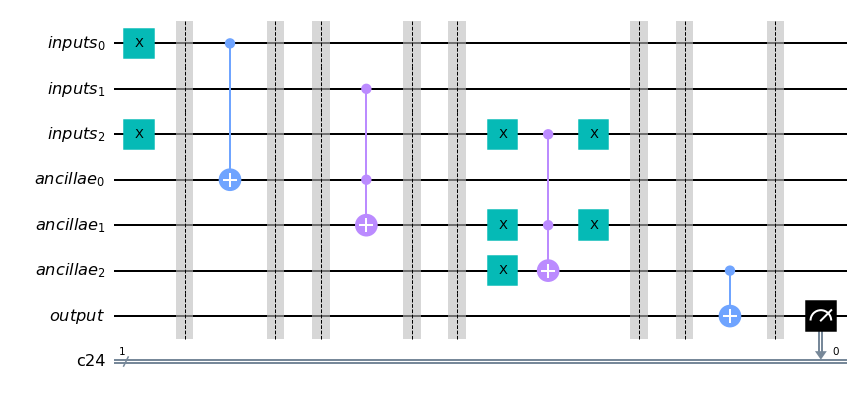

In [224]:
circ.draw(output='mpl')

In [225]:
def simulate(circ):
    
    job = execute(circ,backend=Aer.get_backend('aer_simulator'),shots=1,memory=True)
    return job.result().get_memory()

In [226]:
ans = simulate(circ)
ans

['1']

In [227]:
if n>k != bool(ans):
    print(f'Error: n={n} and k={k} produced an output of {ans}.')

Error: n=5 and k=2 produced an output of ['1'].
